## In this model, we are going to see how to classify images using TensorFlow. Image Classification is a method to classify the images into their respective category classes. CIFAR-10 Dataset as it suggests has 10 different categories of images in it. There is a total of 60000 images of 10 different classes naming Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. All the images are of size 32×32. There are in total 50000 train images and 10000 test images.

### To build an image classifier we make use of tensorflow‘ s keras API to build our model. In order to build a model, it is recommended to have GPU support, or you may use the Google colab notebooks as well.

In [30]:
# Importing the Libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the dataset

# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 107s 1us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


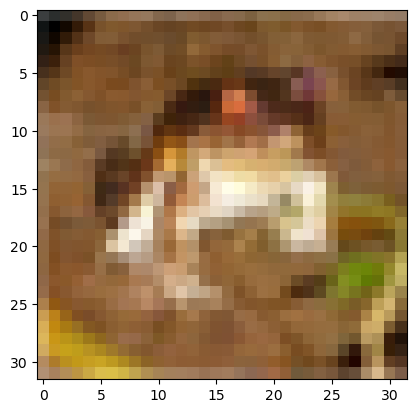

In [3]:
# Visulization

plt.imshow(x_train[0])

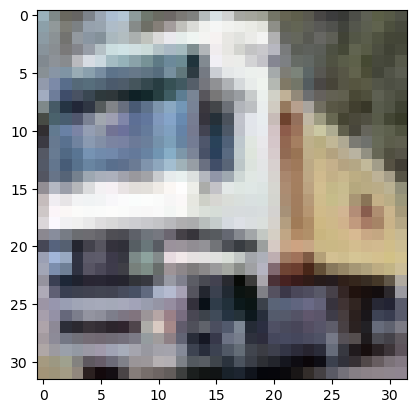

In [5]:
plt.imshow(x_train[1])

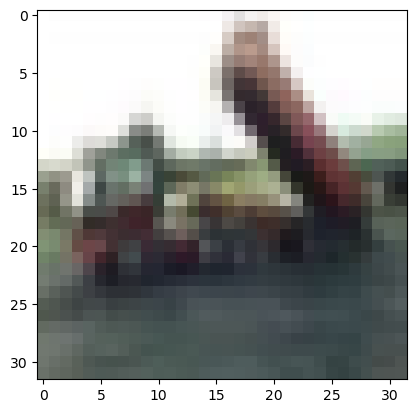

In [6]:
plt.imshow(x_train[2])

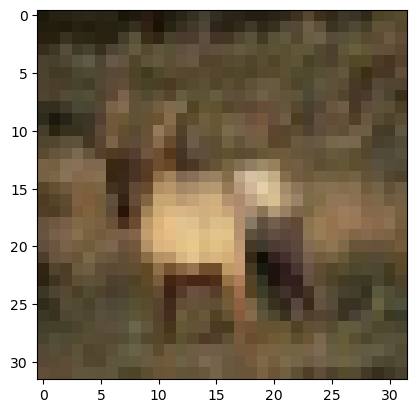

In [7]:
plt.imshow(x_train[3])

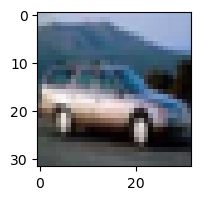

In [10]:
# Reducing the plot size

plt.figure(figsize = (15,2))
plt.imshow(x_train[4])

In [13]:
y_train[:5] # Which are in 2d array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train = y_train.reshape(-1) # normalizing the array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [17]:
classes[7]

'horse'

In [18]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

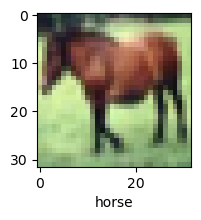

In [19]:
plot_sample(x_train, y_train, 7)

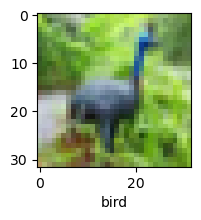

In [22]:
plot_sample(x_train, y_train, 6)

In [23]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [24]:
# Data Normizing by / 255

x_train = x_train / 255
x_test = x_test / 255

In [31]:
# Building ANN - Artificial Neural Network Model

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(1000, activation = 'relu'),
        layers.Dense(10, activation = 'sigmoid'),
    
])

ann.compile(optimizer = 'SGD',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.8142 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.6261 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.5448 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4835 - accuracy: 0.4790
Epoch 5/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4335 - accuracy: 0.4944


In [32]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.4455 - accuracy: 0.4866


[1.445504069328308, 0.48660001158714294]

In [33]:
# Classification Report 

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classifification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 19ms/step
Classifification Report: 
               precision    recall  f1-score   support

           0       0.63      0.45      0.53      1000
           1       0.65      0.57      0.61      1000
           2       0.42      0.25      0.31      1000
           3       0.38      0.30      0.34      1000
           4       0.56      0.24      0.34      1000
           5       0.43      0.38      0.40      1000
           6       0.37      0.78      0.50      1000
           7       0.50      0.61      0.55      1000
           8       0.52      0.73      0.61      1000
           9       0.56      0.55      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.47     10000
weighted avg       0.50      0.49      0.47     10000



## Now building a convolutional neural network to train the images

In [34]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # softmax - Normalize the probability
])

In [35]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.5055 - accuracy: 0.4557
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1631 - accuracy: 0.5917
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0399 - accuracy: 0.6376
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9609 - accuracy: 0.6658
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8971 - accuracy: 0.6905
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8446 - accuracy: 0.7093
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8018 - accuracy: 0.7216
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7611 - accuracy: 0.7361
Epoch 9/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7365 - accuracy: 0.7438
Epoch 10/10
1563/1563 [==============================] - 45s 29m

In [38]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9158 - accuracy: 0.6942


[0.9157989025115967, 0.6941999793052673]

In [39]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [40]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

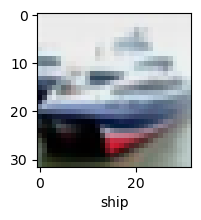

In [43]:
plot_sample(x_test, y_test, 1)

In [44]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 14ms/step


array([[1.38571393e-03, 1.34105314e-04, 5.85880131e-03, 9.21564162e-01,
        3.75232077e-04, 2.07291134e-02, 4.67244023e-03, 8.98419239e-05,
        4.47022915e-02, 4.88191494e-04],
       [2.89403298e-03, 1.21391065e-01, 1.09227676e-06, 6.73021674e-08,
        6.95668190e-10, 1.98770903e-10, 1.03789566e-09, 1.93829020e-09,
        8.75321090e-01, 3.92681686e-04],
       [1.96404248e-01, 9.60408747e-02, 2.39152997e-03, 3.76081909e-03,
        8.74507881e-04, 4.02534759e-04, 5.82405955e-05, 6.86184969e-04,
        6.92592502e-01, 6.78855553e-03],
       [9.27097261e-01, 4.05864194e-02, 2.18884251e-03, 1.23688122e-04,
        7.16124414e-05, 3.00281390e-05, 5.03181082e-06, 8.91871459e-05,
        2.93153878e-02, 4.92470572e-04],
       [1.47917754e-05, 7.94222346e-04, 4.24906164e-02, 7.63302436e-03,
        8.26444447e-01, 3.28150345e-04, 1.22184075e-01, 1.83253474e-06,
        1.02369246e-04, 6.49034791e-06]], dtype=float32)

In [45]:
np.argmax(y_test[0])

0

In [46]:
np.argmax(y_pred[0])

3

In [47]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [48]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

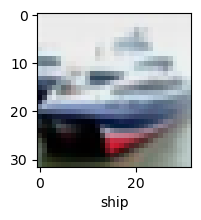

In [49]:
plot_sample(x_test, y_test, 1)

In [50]:
classes[y_classes[1]]

'ship'

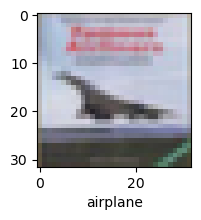

In [52]:
plot_sample(x_test, y_test,3)

In [53]:
classes[y_classes[3]]

'airplane'

In [54]:
# Classification Report 

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classifification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 14ms/step
Classifification Report: 
               precision    recall  f1-score   support

           0       0.67      0.78      0.72      1000
           1       0.79      0.85      0.82      1000
           2       0.50      0.67      0.57      1000
           3       0.56      0.44      0.50      1000
           4       0.66      0.61      0.64      1000
           5       0.68      0.52      0.59      1000
           6       0.80      0.73      0.76      1000
           7       0.79      0.72      0.75      1000
           8       0.76      0.82      0.79      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [ ]:
# RESULT: In this model we used ann first in which, we got less score so we used cnn, the cnn model is good and we got good score by using cnn model.